# Comparison of Corsort variants

This notebook shows how to use the `corsort` package to compare different variants of Corsorts. In details we tested the following possibilities:

- Internal scorer: $\Delta$ (a.k.a. *drift* in the code) or $\rho$ (a.k.a. *spaced* in the code)
- Information measure: $I(i)+I(j)$ or $\max(I(i), I(j))$
- External scorer: $\Delta$ (a.k.a. *drift* in the code) or $\rho$ (a.k.a. *spaced* in the code)

There are much more variants available. We restrain to these 8 for conciseness.

First we load some packages.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from multiprocess.pool import Pool

from corsort import (
    evaluate_convergence, auto_colors,
    WrapSortScorer, scorer_spaced, scorer_drift,
    WrapFullJit, 
    jit_corsort_drift_max_drift, jit_corsort_drift_max_spaced,
    jit_corsort_drift_plus_drift, jit_corsort_drift_plus_spaced,
    jit_corsort_spaced_max_drift, jit_corsort_spaced_max_spaced,
    jit_corsort_spaced_plus_drift, jit_corsort_spaced_plus_spaced,
)

We populate the list of corsorts we want to study. The descriptions should be read like `jit_corsort_{internal_scorer}_{information_measure}_{external_scorer}`.

In [2]:
sort_list = [
    WrapFullJit(jit_corsort_drift_max_drift, compute_history=True),
    WrapFullJit(jit_corsort_drift_max_spaced, compute_history=True),
    WrapFullJit(jit_corsort_drift_plus_drift, compute_history=True),
    WrapFullJit(jit_corsort_drift_plus_spaced, compute_history=True),
    WrapFullJit(jit_corsort_spaced_max_drift, compute_history=True),
    WrapFullJit(jit_corsort_spaced_max_spaced, compute_history=True),
    WrapFullJit(jit_corsort_spaced_plus_drift, compute_history=True),
    WrapFullJit(jit_corsort_spaced_plus_spaced, compute_history=True)]

We decide the value of $n$ to study and the number of trials. For this notebook, we limit to $100$ trials but for better quality 10,000 is recommended (takes a bit more time).

In [3]:
n = 666
nt = 100

We now run the experiments, with some multi-processing to speed-up things.

In [4]:
with Pool() as p:
    convergence = evaluate_convergence(sort_list=sort_list, n=n, nt=nt, pool=p)

Evaluate convergence of corsort_drift_max_drift for n = 666


100%|██████████| 100/100 [00:22<00:00,  4.37it/s]


Evaluate convergence of corsort_drift_max_spaced for n = 666


100%|██████████| 100/100 [00:20<00:00,  4.78it/s]


Evaluate convergence of corsort_drift_plus_drift for n = 666


100%|██████████| 100/100 [00:19<00:00,  5.25it/s]


Evaluate convergence of corsort_drift_plus_spaced for n = 666


100%|██████████| 100/100 [00:20<00:00,  4.89it/s]


Evaluate convergence of corsort_spaced_max_drift for n = 666


100%|██████████| 100/100 [00:20<00:00,  4.81it/s]


Evaluate convergence of corsort_spaced_max_spaced for n = 666


100%|██████████| 100/100 [00:22<00:00,  4.38it/s]


Evaluate convergence of corsort_spaced_plus_drift for n = 666


100%|██████████| 100/100 [00:21<00:00,  4.71it/s]


Evaluate convergence of corsort_spaced_plus_spaced for n = 666


100%|██████████| 100/100 [00:22<00:00,  4.45it/s]


Then we display the results.

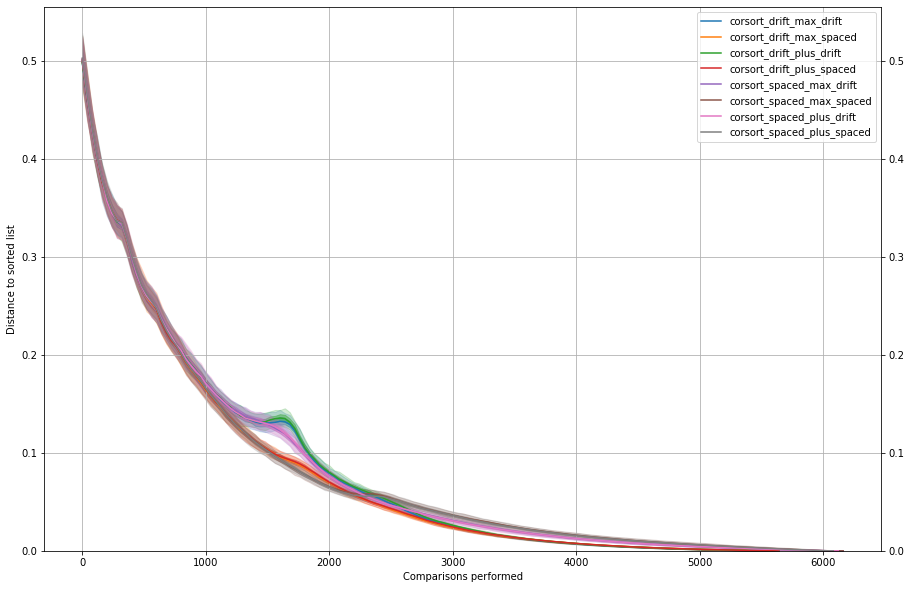

In [5]:
m = n*(n-1)/2
fig = plt.figure(figsize=(15, 10))
ax = plt.axes()
decim=40
color_dict = auto_colors(sort_list)
for name, ref in convergence.items():
    color = color_dict[name]
    p_m = ref.shape[1]
    x = np.arange(p_m)[::decim]
    ref = ref[:, ::decim]
    q = np.zeros((5, ref.shape[1]))
    for i, per in enumerate([2.5, 25, 50, 75, 97.5]):
        q[i, :] = np.percentile(ref, per, axis=0)
    q = q/m
    ax.plot(x, q[2, :], label=name, color=color)
    ax.fill_between(x, q[1, :], q[3, :], alpha=.4, color=color)
    ax.fill_between(x, q[0, :], q[4, :], alpha=.2, color=color)
plt.legend()
plt.grid()
ax.tick_params(labelright=True, right=True)
plt.ylabel('Distance to sorted list')
plt.xlabel('Comparisons performed')
plt.ylim([0, None])
plt.show()

Quick interpretation :

- `max` and `plus` variants (for measure of information) are very close to each other, with a slight advantage to `max`.
- Using a $\Delta$ external scorer creates a kind of bump. The $\rho$ external scorer does not have this issue.
- Most of the time (the exception been around the `bump` from previous item), the $\Delta$ internal scorer is better.

In the end, we selected `corsort_drift_max_spaced` (the orange curve above):

- Internal scorer: $\Delta$ (a.k.a. *drift* in the code)
- Information measure: $\max(I(i), I(j))$
- External scorer: $\rho$ (a.k.a. *spaced* in the code)
